In [1]:
import sqlite3

import pandas as pd

import matplotlib.pyplot as plt


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\Youcode\Desktop\Analysis_modeling_ml_soccer_project\.venv\Lib\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code
  File "C:\Users\Youcode\AppData\Local\Temp\ipykernel_21356\2213075541.py", line 3, in <module>
    import pandas as pd
ModuleNotFoundError: No module named 'pandas'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\Youcode\Desktop\Analysis_modeling_ml_soccer_project\.venv\Lib\site-packages\pygments\styles\__init__.py", line 45, in get_style_by_name
ModuleNotFoundError: No module named 'pygments.styles.default'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\Youcode\Desktop\Analysis_modeling_ml_soccer_project\.venv\Lib\site-packages\IPython\core\interactiveshell.py", line 2168, in showtraceback
  File "c:\Users\Youcode\Desktop\Analysis_modeling_ml_soccer_proje

In [29]:
conn =sqlite3.connect("./database.sqlite")

cursor = conn.cursor()


Retrieving all the tables from the database 

In [30]:
table_match = pd.read_sql('select * from Match',conn)
table_player = pd.read_sql('select * from Player',conn)
table_player_attribute = pd.read_sql('select * from Player_Attributes',conn)
table_league = pd.read_sql('select * from League',conn)
table_country = pd.read_sql('select * from Country',conn)
table_team = pd.read_sql('select * from Team',conn)
table_team_attribute = pd.read_sql('select * from Team_Attributes',conn)

In [48]:
import xml.etree.ElementTree as ET
import pandas as pd
table_match = pd.read_sql('select * from match',conn)

df_goal_non_nan = table_match.dropna(subset='goal')


def parse_goals_to_table(df_goal):
    
    all_goal_data = []

    for i,xml_data in enumerate(df_goal['goal']):
        
        if pd.notnull(xml_data):
            x = df_goal.index[i]
            y= df_goal['season'][x]
            
            root = ET.fromstring(xml_data)
            
            for value in root.findall('value'):
                goal_info = {
                    'season':y,
                    'id_match':x,
                    'comment': value.find('comment').text if value.find('comment') is not None else None,
                    'goals': value.find('stats/goals').text if value.find('stats/goals') is not None else None,
                    'shoton': value.find('stats/shoton').text if value.find('stats/shoton') is not None else None,
                    'event_incident_typefk': value.find('event_incident_typefk').text if value.find('event_incident_typefk') is not None else None,
                    'elapsed': value.find('elapsed').text if value.find('elapsed') is not None else None,
                    'player1': value.find('player1').text if value.find('player1') is not None else None,
                    'player2': value.find('player2').text if value.find('player2') is not None else None,
                    'subtype': value.find('subtype').text if value.find('subtype') is not None else None,
                    'sortorder': value.find('sortorder').text if value.find('sortorder') is not None else None,
                    'team': value.find('team').text if value.find('team') is not None else None,
                    'goal_id': value.find('id').text if value.find('id') is not None else None,
                    'goal_type': value.find('goal_type').text if value.find('goal_type') is not None else None,
                    'n': value.find('n').text if value.find('n') is not None else None,
                    'type': value.find('type').text if value.find('type') is not None else None
                }
                
                all_goal_data.append(goal_info)

    return pd.DataFrame(all_goal_data)


df_goal_parsed = parse_goals_to_table(df_goal_non_nan)

df_goal_parsed.head(50)


,season,id_match,comment,goals,shoton,event_incident_typefk,elapsed,player1,player2,subtype,sortorder,team,goal_id,goal_type,n,type
0,2008/2009,1728,n,1,1,406,22,37799,38807,header,5,10261,378998,n,295,goal
1,2008/2009,1728,n,1,1,393,24,24148,24154,shot,4,10260,379019,n,298,goal
2,2008/2009,1729,n,1,1,393,4,26181,39297,shot,2,9825,375546,n,231,goal
3,2008/2009,1730,n,1,1,407,83,30853,30889,distance,0,8650,378041,n,344,goal
4,2008/2009,1731,n,1,1,393,4,23139,36394,shot,2,8654,376060,n,244,goal
5,2008/2009,1731,n,1,1,393,10,23139,37277,shot,1,8654,376165,n,251,goal
6,2008/2009,1731,n,1,1,411,47,127857,34466,volley,3,8528,376929,n,294,goal
7,2008/2009,1732,n,1,1,406,47,26165,23354,header,2,10252,378837,n,251,goal
8,2008/2009,1732,p,None,None,20,64,40198,None,None,0,8456,378981,p,266,goal
9,2008/2009,1732,n,1,1,393,69,23264,24658,shot,1,10252,379030,n,270,goal


In [49]:
df_goal_parsed['player1'].isna().sum()

np.int64(117)

In [53]:
df_goal_parsed['goals'] = pd.to_numeric(df_goal_parsed['goals'], errors='coerce')
df_goal_parsed['goals'] = df_goal_parsed['goals'].fillna(1)
#assite per player
player_total_assist = df_goal_parsed.groupby(['player2','season'])['goals'].sum().reset_index()
#goals per player
player_total_goals = df_goal_parsed.groupby(['player1','season'])['goals'].sum().reset_index()

player_total_assist.rename(columns={'goals': 'assist'}, inplace=True)

player_total_goals[player_total_goals['player1'] == '30981']

,player1,season,goals
5706,30981,2008/2009,25.0
5707,30981,2009/2010,35.0
5708,30981,2010/2011,32.0
5709,30981,2011/2012,52.0
5710,30981,2012/2013,46.0
5711,30981,2013/2014,29.0
5712,30981,2014/2015,46.0
5713,30981,2015/2016,30.0


In [54]:
player_total_assist[player_total_assist['player2'] == '30981']

,player2,season,assist
3787,30981,2008/2009,8.0
3788,30981,2009/2010,9.0
3789,30981,2010/2011,17.0
3790,30981,2011/2012,15.0
3791,30981,2013/2014,6.0
3792,30981,2014/2015,18.0
3793,30981,2015/2016,16.0


In [55]:
table_player

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154
...,...,...,...,...,...,...,...
11055,11071,26357,Zoumana Camara,2488,1979-04-03 00:00:00,182.88,168
11056,11072,111182,Zsolt Laczko,164680,1986-12-18 00:00:00,182.88,176
11057,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154
11058,11074,35506,Zurab Khizanishvili,47058,1981-10-06 00:00:00,185.42,172


In [57]:
import pandas as pd

# Assurez-vous que les colonnes nécessaires sont du même type
table_player['player_api_id'] = table_player['player_api_id'].astype(int)
player_total_goals['player1'] = player_total_goals['player1'].astype(int)
player_total_assist['player2'] = player_total_assist['player2'].astype(int)



# Ajouter les colonnes 'goal' et 'assist', en remplissant les valeurs manquantes avec 0
table_player = table_player.merge(player_total_assist,how='left',left_on='player_api_id',right_on='player2')
table_player = table_player.merge(player_total_goals,how='left',right_on=['player1','season'],left_on=['player_api_id','season'])
table_player['goals'] = table_player['goals'].fillna(0).astype(int)
table_player['assist'] = table_player['assist'].fillna(0).astype(int)




In [58]:
table_player

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,player2,season,assist,player1,goals
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,NaN,NaN,0,NaN,0
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146,155782.0,2014/2015,4,155782.0,2
2,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146,155782.0,2015/2016,4,155782.0,2
3,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163,NaN,NaN,0,NaN,0
4,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198,NaN,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
14682,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154,NaN,NaN,0,NaN,0
14683,11074,35506,Zurab Khizanishvili,47058,1981-10-06 00:00:00,185.42,172,NaN,NaN,0,NaN,0
14684,11075,39902,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176,39902.0,2008/2009,4,39902.0,6
14685,11075,39902,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176,39902.0,2009/2010,6,39902.0,10


In [59]:
table_player = table_player.drop(columns=['id','player2','player1'])
table_player

,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,season,assist,goals
0,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,NaN,0,0
1,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146,2014/2015,4,2
2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146,2015/2016,4,2
3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163,NaN,0,0
4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198,NaN,0,0
...,...,...,...,...,...,...,...,...,...
14682,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154,NaN,0,0
14683,35506,Zurab Khizanishvili,47058,1981-10-06 00:00:00,185.42,172,NaN,0,0
14684,39902,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176,2008/2009,4,6
14685,39902,Zvjezdan Misimovic,102359,1982-06-05 00:00:00,180.34,176,2009/2010,6,10


In [60]:
#table_player.to_csv('player.csv',index=False)


In [63]:
data = pd.read_csv('./ML/player.csv')

In [31]:
first_fifty_players = pd.read_sql("""select Player.height as height,
                                          Player.weight as weight,
                                          Player_Attributes.overall_rating as rating,
                                          Player_Attributes.potential as potential,
                                          Player_Attributes.preferred_foot,
                                          Player.player_name as name,
                                          Player.birthday as birthday,
                                          Player.player_api_id
                                    FROM Player
                                    LEFT JOIN Player_Attributes ON Player.player_api_id = Player_Attributes.player_api_id
                                    WHERE Player_Attributes.potential IS NOT NULL 
                                      AND Player_Attributes.date BETWEEN '2015-01-01' AND '2016-12-31'
                                    GROUP BY Player_Attributes.player_api_id
                                    ORDER BY Player_Attributes.overall_rating DESC 
                                    LIMIT 50
                                    ;""", conn)
first_fifty_players

,height,weight,rating,potential,preferred_foot,name,birthday,player_api_id
0,170.18,159,94,94,left,Lionel Messi,1987-06-24 00:00:00,30981
1,185.42,176,93,93,right,Cristiano Ronaldo,1985-02-05 00:00:00,30893
2,182.88,187,90,90,right,Luis Suarez,1987-01-24 00:00:00,40636
3,193.04,203,90,90,right,Manuel Neuer,1986-03-27 00:00:00,27299
4,175.26,150,90,94,right,Neymar,1992-02-05 00:00:00,19533
5,195.58,209,89,89,right,Zlatan Ibrahimovic,1981-10-03 00:00:00,35724
6,180.34,176,89,89,left,Arjen Robben,1984-01-23 00:00:00,30834
7,172.72,163,88,90,right,Eden Hazard,1991-01-07 00:00:00,107417
8,185.42,174,88,89,right,Robert Lewandowski,1988-08-21 00:00:00,93447
9,182.88,174,88,88,right,Thiago Silva,1984-09-22 00:00:00,80562


In [32]:
# Query to get data for Eden Hazard and others between 2007 and 2016
player_progression = pd.read_sql("""
    SELECT Player.player_name, Player_Attributes.date, Player_Attributes.overall_rating
    FROM Player
    LEFT JOIN Player_Attributes ON Player.player_api_id = Player_Attributes.player_api_id
    WHERE Player.player_name IN ('Eden Hazard','Luis Suarez', 'Lionel Messi', 'Cristiano Ronaldo')
      AND Player_Attributes.date BETWEEN '2007-01-01' AND '2016-12-31'
    ORDER BY Player_Attributes.date Asc;
    """, conn)

player_progression

,player_name,date,overall_rating
0,Cristiano Ronaldo,2007-02-22 00:00:00,87
1,Eden Hazard,2007-02-22 00:00:00,51
2,Lionel Messi,2007-02-22 00:00:00,85
3,Luis Suarez,2007-02-22 00:00:00,61
4,Cristiano Ronaldo,2007-08-30 00:00:00,91
...,...,...,...
115,Cristiano Ronaldo,2015-10-16 00:00:00,93
116,Lionel Messi,2015-10-16 00:00:00,94
117,Luis Suarez,2015-10-16 00:00:00,90
118,Lionel Messi,2015-12-17 00:00:00,94


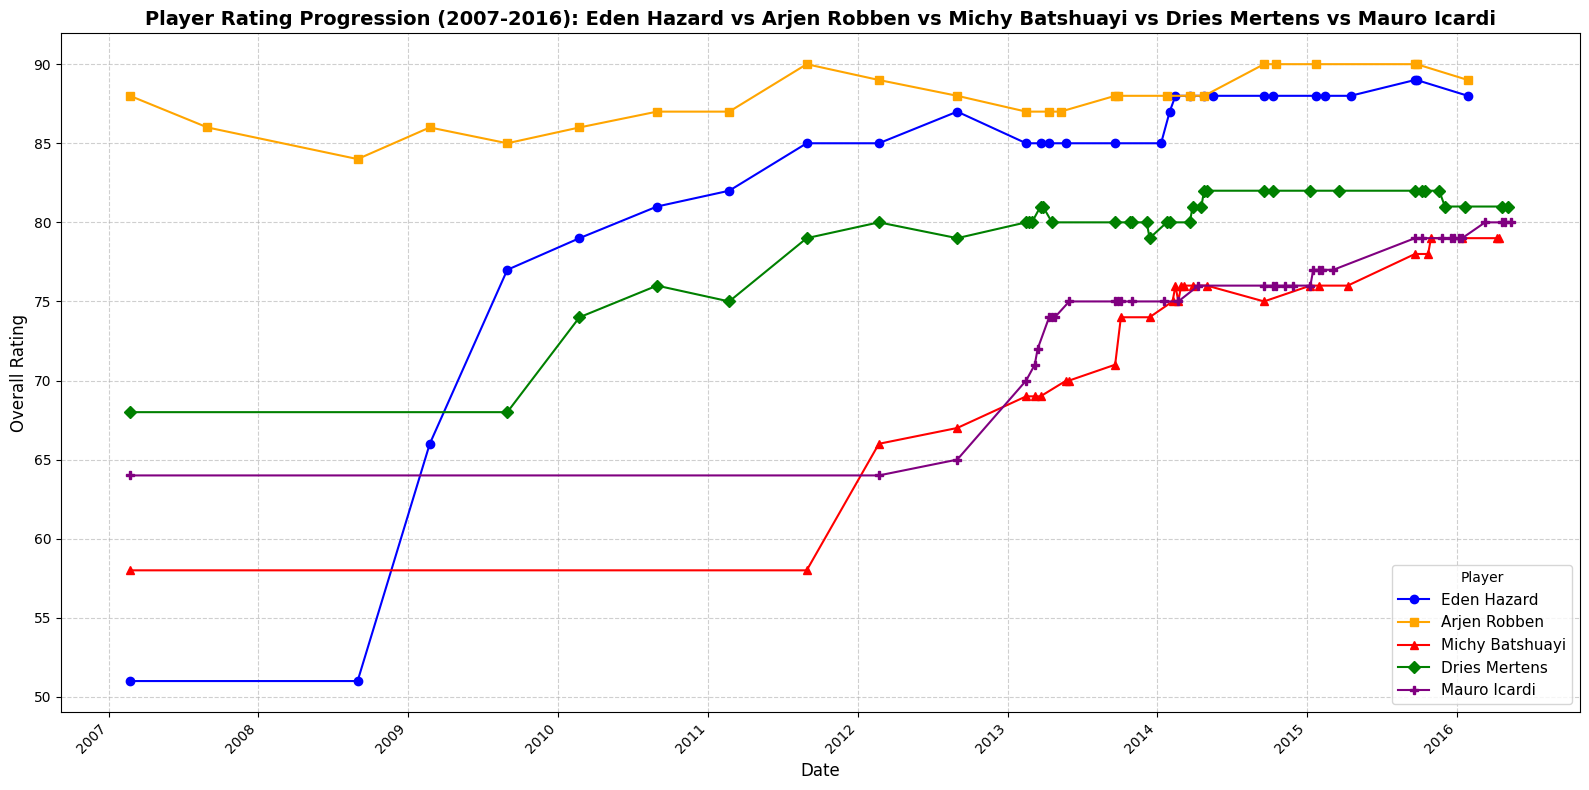

In [33]:
def plot_player_progression(player_names, conn, start_date='2007-01-01', end_date='2016-12-31'):
    # SQL query to get data for the specified players
    query = f"""
        SELECT Player.player_name, Player_Attributes.date, Player_Attributes.overall_rating
        FROM Player
        LEFT JOIN Player_Attributes ON Player.player_api_id = Player_Attributes.player_api_id
        WHERE Player.player_name IN ({', '.join([f"'{name}'" for name in player_names])})
          AND Player_Attributes.date BETWEEN '{start_date}' AND '{end_date}'
        ORDER BY Player_Attributes.date;
    """

    # Fetch data
    player_progression = pd.read_sql(query, conn)
    
    # Convert date to datetime format
    player_progression['date'] = pd.to_datetime(player_progression['date'])

    # Define color and style combinations
    colors = ['blue', 'orange', 'red', 'green', 'purple', 'black']
    markers = ['o', 's', '^', 'D', 'P', '*']

    # Plotting the data with enhancements
    plt.figure(figsize=(16, 8))

    for i, player in enumerate(player_names):
        player_data = player_progression[player_progression['player_name'] == player]
        plt.plot(player_data['date'], player_data['overall_rating'], 
                 marker=markers[i % len(markers)], 
                 color=colors[i % len(colors)], 
                 linestyle='-', 
                 label=player)

    # Adding chart details
    plt.title(f"Player Rating Progression ({start_date[:4]}-{end_date[:4]}): {' vs '.join(player_names)}", fontsize=14, fontweight='bold')
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Overall Rating', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(range(50, 95, 5))  # Adjust y-axis ticks for better readability
    plt.legend(title='Player', fontsize=11)
    plt.grid(True, linestyle='--', alpha=0.6)

    # Show the plot
    plt.tight_layout()  # Adjust layout to prevent clipping
    plt.show()
    
plot_player_progression(['Eden Hazard', 'Arjen Robben', 'Michy Batshuayi', 'Dries Mertens', 'Mauro Icardi'], conn)


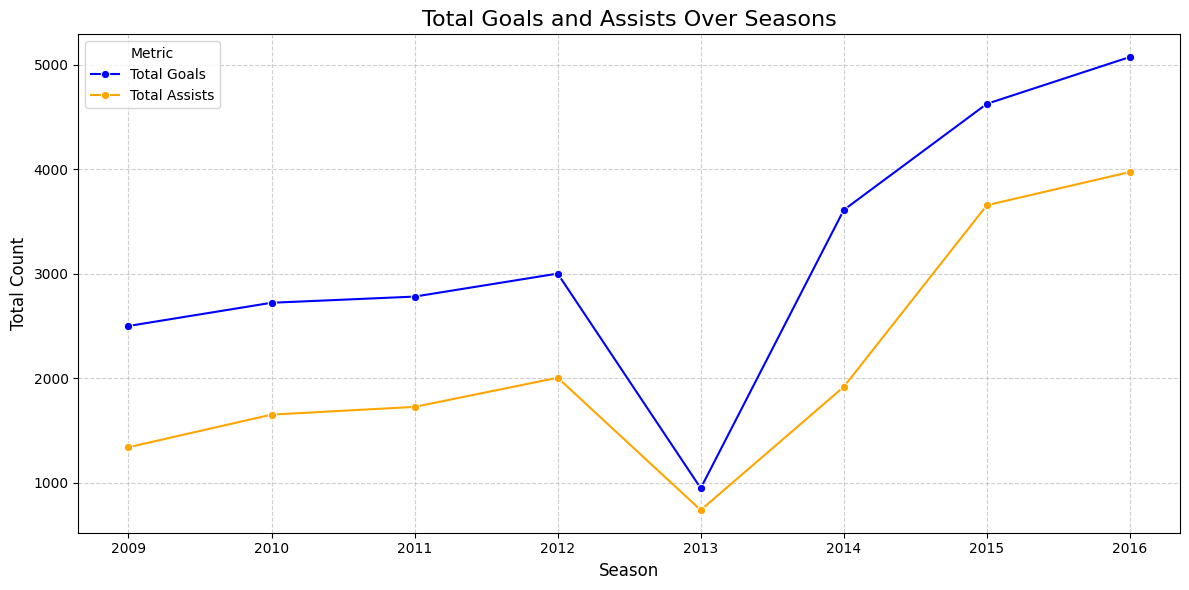

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_goals_and_assists_over_seasons(data_file):
    """
    Creates a line plot of assists and goals over seasons.

    Parameters:
    - data_file (str): Path to the CSV file containing player data.

    Returns:
    - None (displays the plot).
    """
    # Load the dataset
    data = pd.read_csv(data_file)
    
    # Ensure the season column is correctly formatted (e.g., extract the year if necessary)
    if 'season' not in data.columns:
        data['season'] = pd.to_datetime(data['date']).dt.year
    
    # Group data by season and calculate total goals and assists
    season_data = data.groupby('season')[['goals', 'assist']].sum().reset_index()
    
    # Plot the data
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='season', y='goals', data=season_data, marker='o', label='Total Goals', color='blue')
    sns.lineplot(x='season', y='assist', data=season_data, marker='o', label='Total Assists', color='orange')
    
    # Add titles and labels
    plt.title('Total Goals and Assists Over Seasons', fontsize=16)
    plt.xlabel('Season', fontsize=12)
    plt.ylabel('Total Count', fontsize=12)
    plt.legend(title='Metric', fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    
    # Display the plot
    plt.show()

# Example usage
data_file = './ML/player.csv'
plot_goals_and_assists_over_seasons(data_file)


In [41]:
data = pd.read_csv('./ML/player.csv')

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

def plot_age_vs_performance(data, performance_column='goals'):
    """
    Plots player age against their performance (goals or assists).
    
    Parameters:
    - data (DataFrame): The player dataset containing 'birthday' and performance columns.
    - performance_column (str): Column name for the performance metric ('goals' or 'assist').
    
    Returns:
    - None: Displays the plot.
    """
    # Ensure the performance column exists
    if performance_column not in data.columns:
        raise ValueError(f"Column '{performance_column}' not found in the dataset.")
    
    # Calculate player age from their birthday
    data['age'] = data['birthday'].apply(lambda x: datetime.now().year - pd.to_datetime(x).year)
    
    # Remove rows with missing or invalid data
    valid_data = data.dropna(subset=['age', performance_column])
    
    # Scatter plot: Age vs. Performance
    plt.figure(figsize=(10, 6))
    plt.scatter(valid_data['age'], valid_data[performance_column], alpha=0.6, color='blue', edgecolors='w')
    plt.title(f"Player Age vs {performance_column.capitalize()}", fontsize=16)
    plt.xlabel('Age (Years)', fontsize=14)
    plt.ylabel(performance_column.capitalize(), fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()


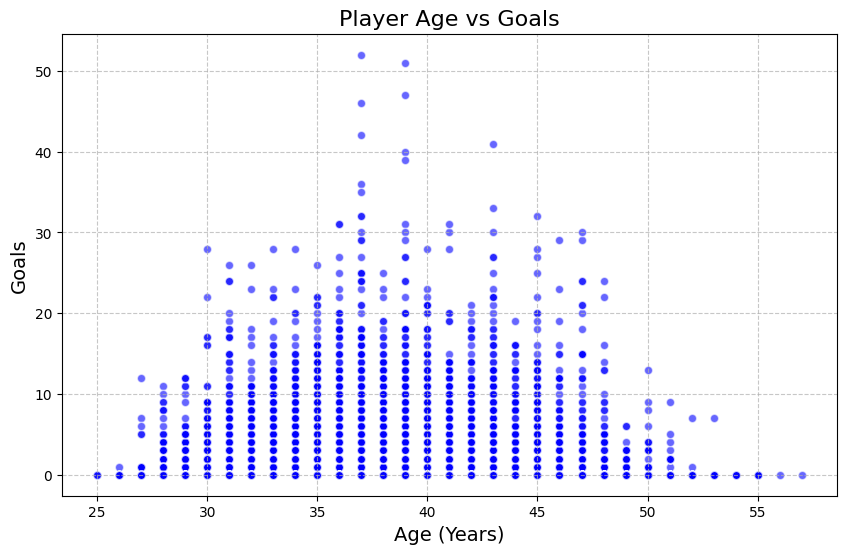

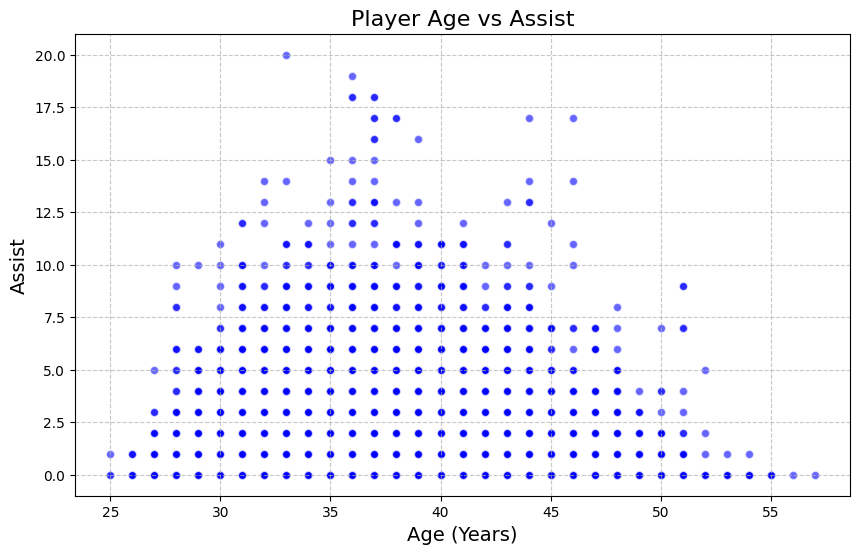

In [44]:
plot_age_vs_performance(data, performance_column='assist')

In [45]:
import matplotlib.pyplot as plt

def plot_physical_vs_performance_combined(data):
    """
    Creates a combined figure with subplots for:
    - Height vs Goals
    - Weight vs Goals
    - Height vs Assists
    - Weight vs Assists
    
    Parameters:
    - data (DataFrame): The dataset containing 'height', 'weight', 'goals', and 'assist' columns.
    
    Returns:
    - None: Displays the figure.
    """
    # Ensure required columns exist
    required_columns = ['height', 'weight', 'goals', 'assist']
    for col in required_columns:
        if col not in data.columns:
            raise ValueError(f"Column '{col}' is missing from the dataset.")
    
    # Remove rows with missing values in the required columns
    valid_data = data.dropna(subset=required_columns)
    
    # Set up a 2x2 grid of subplots
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle("Physical Attributes vs Performance", fontsize=18, weight='bold')
    
    # Scatter Plot: Height vs Goals
    axes[0, 0].scatter(valid_data['height'], valid_data['goals'], alpha=0.6, color='blue', edgecolors='w')
    axes[0, 0].set_title("Height vs Goals", fontsize=14)
    axes[0, 0].set_xlabel("Height (cm)", fontsize=12)
    axes[0, 0].set_ylabel("Goals", fontsize=12)
    axes[0, 0].grid(True, linestyle='--', alpha=0.7)
    
    # Scatter Plot: Weight vs Goals
    axes[0, 1].scatter(valid_data['weight'], valid_data['goals'], alpha=0.6, color='green', edgecolors='w')
    axes[0, 1].set_title("Weight vs Goals", fontsize=14)
    axes[0, 1].set_xlabel("Weight (kg)", fontsize=12)
    axes[0, 1].set_ylabel("Goals", fontsize=12)
    axes[0, 1].grid(True, linestyle='--', alpha=0.7)
    
    # Scatter Plot: Height vs Assists
    axes[1, 0].scatter(valid_data['height'], valid_data['assist'], alpha=0.6, color='orange', edgecolors='w')
    axes[1, 0].set_title("Height vs Assists", fontsize=14)
    axes[1, 0].set_xlabel("Height (cm)", fontsize=12)
    axes[1, 0].set_ylabel("Assists", fontsize=12)
    axes[1, 0].grid(True, linestyle='--', alpha=0.7)
    
    # Scatter Plot: Weight vs Assists
    axes[1, 1].scatter(valid_data['weight'], valid_data['assist'], alpha=0.6, color='red', edgecolors='w')
    axes[1, 1].set_title("Weight vs Assists", fontsize=14)
    axes[1, 1].set_xlabel("Weight (kg)", fontsize=12)
    axes[1, 1].set_ylabel("Assists", fontsize=12)
    axes[1, 1].grid(True, linestyle='--', alpha=0.7)
    
    # Adjust layout for better spacing
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


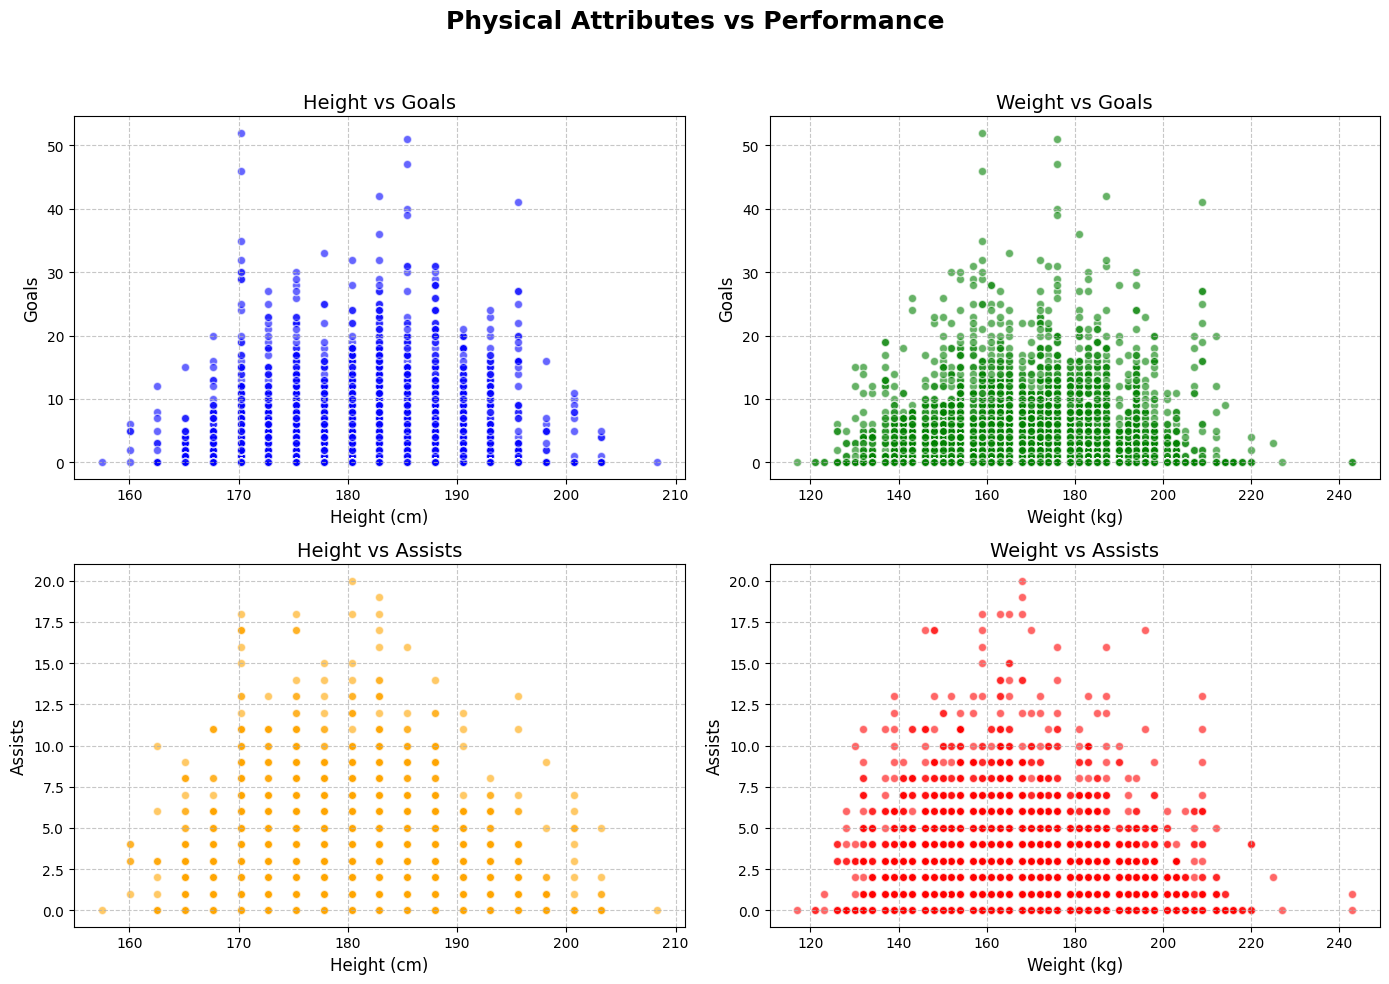

In [46]:
plot_physical_vs_performance_combined(data)

# ANALYSE DES EQUIPES 

In [253]:
#loading the data: 
import numpy as np 
import pandas as pd 
import sqlite3
import matplotlib.pyplot as plt


database = './database.sqlite' 

# sqlite3.connect() Creates a connection object
conn = sqlite3.connect(database)
tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


In [254]:
countries = pd.read_sql('SELECT * FROM Country;', conn)
player = pd.read_sql('SELECT * FROM Player;', conn)
match = pd.read_sql('SELECT * FROM Match;', conn)
league = pd.read_sql('SELECT * FROM League;', conn)
team= pd.read_sql('SELECT * FROM Team;', conn)
team_attr = pd.read_sql('SELECT * FROM Team_Attributes;', conn)

In [255]:
match= pd.read_sql("""SELECT match_api_id,
                   Country.name as country_name,
                   League.name as league_name,
                   HomeTeam.team_long_name as HomeTeam_long_name,
                   HomeTeam.team_short_name as HomeTeam_short_name ,
                   AwayTeam.team_long_name as AwayTeam_long_name ,
                   AwayTeam.team_short_name as AwayTeam_short_name,
                   season, stage, date, home_team_api_id
                   , away_team_api_id, 
                   home_team_goal,
                   away_team_goal
                   FROM Match
                   JOIN Country ON Match.country_id= Country.id
                   JOIN League ON Match.league_id= League.id
                   JOIN Team HomeTeam on Match.home_team_api_id=HomeTeam.team_api_id 
                   JOIN Team AwayTeam on Match.away_team_api_id=AwayTeam.team_api_id;""", conn)
match

,match_api_id,country_name,league_name,HomeTeam_long_name,HomeTeam_short_name,AwayTeam_long_name,AwayTeam_short_name,season,stage,date,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,492473,Belgium,Belgium Jupiler League,KRC Genk,GEN,Beerschot AC,BAC,2008/2009,1,2008-08-17 00:00:00,9987,9993,1,1
1,492474,Belgium,Belgium Jupiler League,SV Zulte-Waregem,ZUL,Sporting Lokeren,LOK,2008/2009,1,2008-08-16 00:00:00,10000,9994,0,0
2,492475,Belgium,Belgium Jupiler League,KSV Cercle Brugge,CEB,RSC Anderlecht,AND,2008/2009,1,2008-08-16 00:00:00,9984,8635,0,3
3,492476,Belgium,Belgium Jupiler League,KAA Gent,GEN,RAEC Mons,MON,2008/2009,1,2008-08-17 00:00:00,9991,9998,5,0
4,492477,Belgium,Belgium Jupiler League,FCV Dender EH,DEN,Standard de Liège,STL,2008/2009,1,2008-08-16 00:00:00,7947,9985,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,1992091,Switzerland,Switzerland Super League,FC St. Gallen,GAL,FC Thun,THU,2015/2016,9,2015-09-22 00:00:00,10190,10191,1,0
25975,1992092,Switzerland,Switzerland Super League,FC Vaduz,VAD,FC Luzern,LUZ,2015/2016,9,2015-09-23 00:00:00,9824,10199,1,2
25976,1992093,Switzerland,Switzerland Super League,Grasshopper Club Zürich,GRA,FC Sion,SIO,2015/2016,9,2015-09-23 00:00:00,9956,10179,2,0
25977,1992094,Switzerland,Switzerland Super League,Lugano,LUG,FC Zürich,ZUR,2015/2016,9,2015-09-22 00:00:00,7896,10243,0,0


In [302]:
home_teams = match.groupby('HomeTeam_long_name')[['home_team_goal','away_team_goal']].sum()



In [257]:
home_teams.to_csv('./teams_stats.csv')

In [258]:
team_statos = pd.read_csv('./teams_stats.csv')

In [259]:
team_statos

,HomeTeam_long_name,home_team_goal,away_team_goal
0,1. FC Kaiserslautern,37,47
1,1. FC Köln,116,139
2,1. FC Nürnberg,108,118
3,1. FSV Mainz 05,171,129
4,AC Ajaccio,64,77
...,...,...,...
291,Xerez Club Deportivo,20,29
292,Zagłębie Lubin,116,108
293,Zawisza Bydgoszcz,43,38
294,Évian Thonon Gaillard FC,105,103


In [260]:
team_statos['total_goals'] = team_statos['away_team_goal']+ team_statos['home_team_goal']

In [261]:
team_statos[team_statos['HomeTeam_long_name'] == 'FC Barcelona']

,HomeTeam_long_name,home_team_goal,away_team_goal,total_goals
75,FC Barcelona,495,101,596


In [262]:

top_10_teams = team_statos.sort_values('total_goals' ,ascending=False).head(10)
top_home_scorers = top_10_teams.sort_values('home_team_goal' ,ascending=False,ignore_index=True)[['HomeTeam_long_name','home_team_goal']]

top_away_scorers = top_10_teams.sort_values('away_team_goal' ,ascending=False,ignore_index=True)[['HomeTeam_long_name','away_team_goal']]
top_away_scorers.columns = ['AwayTeam_long_name','away_team_goal']
top_away_scorers


,AwayTeam_long_name,away_team_goal
0,SC Heerenveen,202
1,BSC Young Boys,166
2,Real Madrid CF,147
3,Chelsea,129
4,FC Basel,126
5,PSV,126
6,Manchester City,125
7,FC Barcelona,101
8,FC Bayern Munich,96
9,Celtic,88


In [299]:
def plot():
    fig, axes = plt.subplots(1, 2, figsize=(14, 10))
    fig.suptitle("HOME-AWAY vs Performance", fontsize=18, weight='bold')
    
    # Scatter Plot: HomeTeams vs Goals
    axes[0].barh(top_home_scorers['HomeTeam_long_name'], top_home_scorers['home_team_goal'], alpha=0.6, color='blue')
    axes[0].set_title("HomeTeams vs Goals", fontsize=14)
    axes[0].set_xlabel("Goals", fontsize=12)
    axes[0].set_ylabel("Teams", fontsize=12)
    axes[0].grid(True, linestyle='--', alpha=0.7)
    
    
    # Scatter Plot: HomeTeams vs Goals
    axes[1].barh(top_away_scorers['AwayTeam_long_name'], top_away_scorers['away_team_goal'], alpha=0.6, color='green')
    axes[1].set_title("AwayTeams vs Goals", fontsize=14)
    axes[1].set_xlabel("Goals", fontsize=12)
    axes[1].set_ylabel("Teams", fontsize=12)
    axes[1].grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

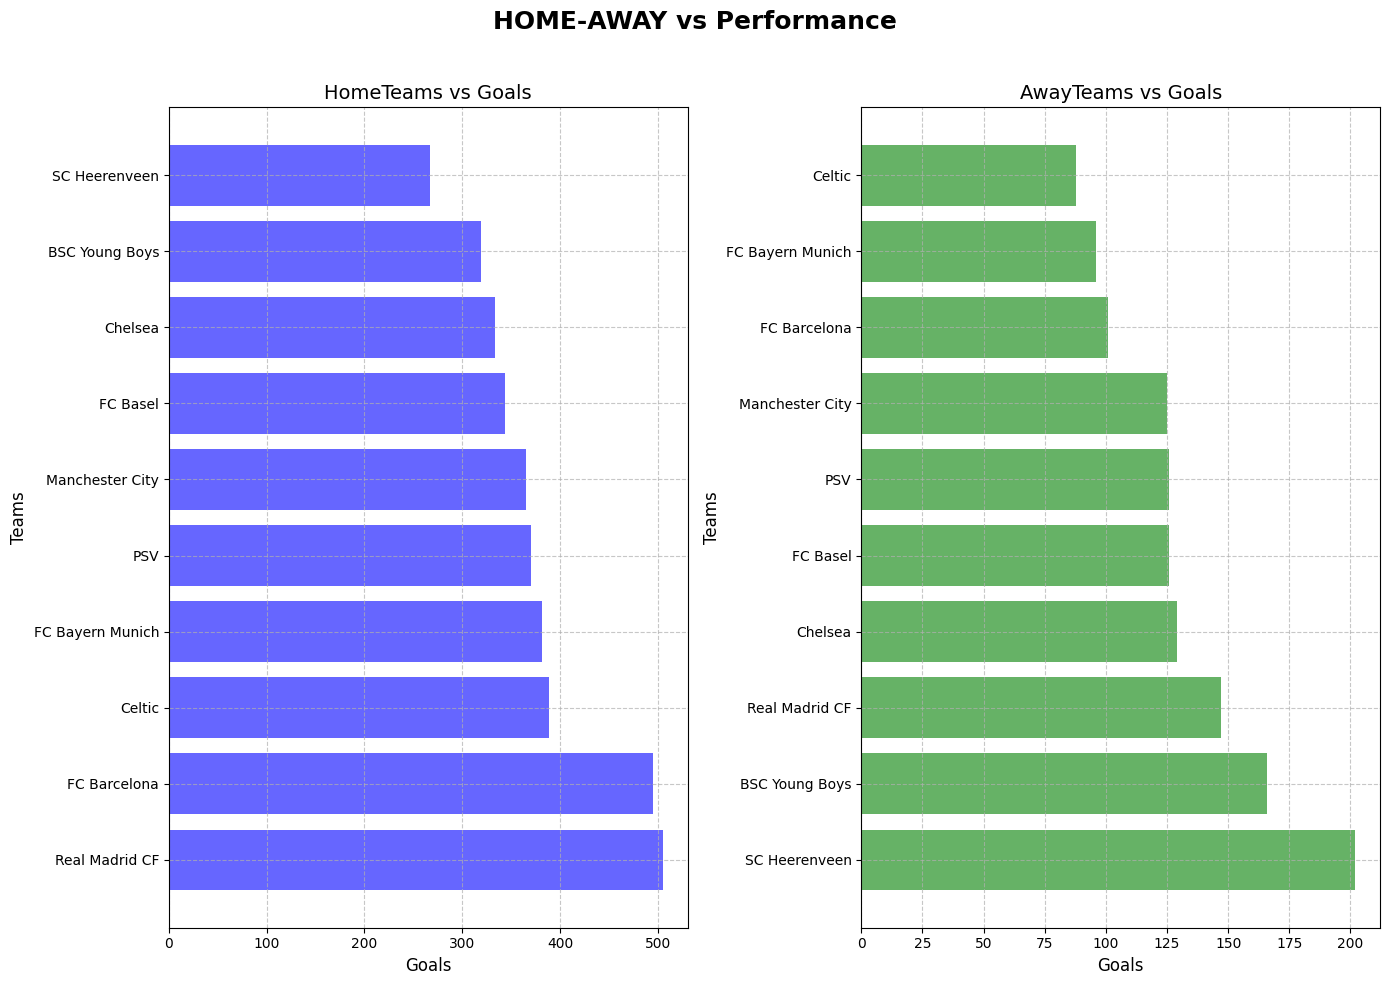

In [300]:
plot()

In [265]:
def plot():
    fig, axes = plt.subplots(2, 1, figsize=(14, 10))
    fig.suptitle("Physical Attributes vs Performance", fontsize=18, weight='bold')
    
    # Scatter Plot: Height vs Goals
    axes[0].bar(top_home_scorers['HomeTeam_long_name'], top_home_scorers['home_team_goal'], alpha=0.6, color='blue')
    axes[0].set_title("", fontsize=14)
    axes[0].set_xlabel("Height (cm)", fontsize=12)
    axes[0].set_ylabel("Goals", fontsize=12)
    axes[0].grid(True, linestyle='--', alpha=0.7)
    
    # Scatter Plot: Weight vs Goals
    axes[1].bar(top_home_scorers['HomeTeam_long_name'], top_home_scorers['home_team_goal'], alpha=0.6, color='green')
    axes[1].set_title("Weight vs Goals", fontsize=14)
    axes[1].set_xlabel("Weight (kg)", fontsize=12)
    axes[1].set_ylabel("Goals", fontsize=12)
    axes[1].grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

In [266]:
match

,match_api_id,country_name,league_name,HomeTeam_long_name,HomeTeam_short_name,AwayTeam_long_name,AwayTeam_short_name,season,stage,date,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,492473,Belgium,Belgium Jupiler League,KRC Genk,GEN,Beerschot AC,BAC,2008/2009,1,2008-08-17 00:00:00,9987,9993,1,1
1,492474,Belgium,Belgium Jupiler League,SV Zulte-Waregem,ZUL,Sporting Lokeren,LOK,2008/2009,1,2008-08-16 00:00:00,10000,9994,0,0
2,492475,Belgium,Belgium Jupiler League,KSV Cercle Brugge,CEB,RSC Anderlecht,AND,2008/2009,1,2008-08-16 00:00:00,9984,8635,0,3
3,492476,Belgium,Belgium Jupiler League,KAA Gent,GEN,RAEC Mons,MON,2008/2009,1,2008-08-17 00:00:00,9991,9998,5,0
4,492477,Belgium,Belgium Jupiler League,FCV Dender EH,DEN,Standard de Liège,STL,2008/2009,1,2008-08-16 00:00:00,7947,9985,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,1992091,Switzerland,Switzerland Super League,FC St. Gallen,GAL,FC Thun,THU,2015/2016,9,2015-09-22 00:00:00,10190,10191,1,0
25975,1992092,Switzerland,Switzerland Super League,FC Vaduz,VAD,FC Luzern,LUZ,2015/2016,9,2015-09-23 00:00:00,9824,10199,1,2
25976,1992093,Switzerland,Switzerland Super League,Grasshopper Club Zürich,GRA,FC Sion,SIO,2015/2016,9,2015-09-23 00:00:00,9956,10179,2,0
25977,1992094,Switzerland,Switzerland Super League,Lugano,LUG,FC Zürich,ZUR,2015/2016,9,2015-09-22 00:00:00,7896,10243,0,0


In [267]:
import datetime as dt

In [304]:
import datetime as dt
match['date'] = pd.to_datetime(match['date'])
match['date'] = match['date'].dt.year
match_grouped = match.groupby(['date','HomeTeam_long_name'])['home_team_goal'].sum()
match_grouped = pd.DataFrame(match_grouped)
match_grouped.to_csv('./mathes_groupped_by_season.csv')
mathes_groupped_by_season = pd.read_csv('./mathes_groupped_by_season.csv')


In [307]:
mathes_groupped_by_season


,date,HomeTeam_long_name,home_team_goal
0,1970,1. FC Kaiserslautern,37
1,1970,1. FC Köln,116
2,1970,1. FC Nürnberg,108
3,1970,1. FSV Mainz 05,171
4,1970,AC Ajaccio,64
...,...,...,...
291,1970,Xerez Club Deportivo,20
292,1970,Zagłębie Lubin,116
293,1970,Zawisza Bydgoszcz,43
294,1970,Évian Thonon Gaillard FC,105


C:\Users\Youcode\AppData\Local\Temp\ipykernel_1252\3963622492.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['date'] = pd.to_datetime(filtered_data['date'], format='%Y')


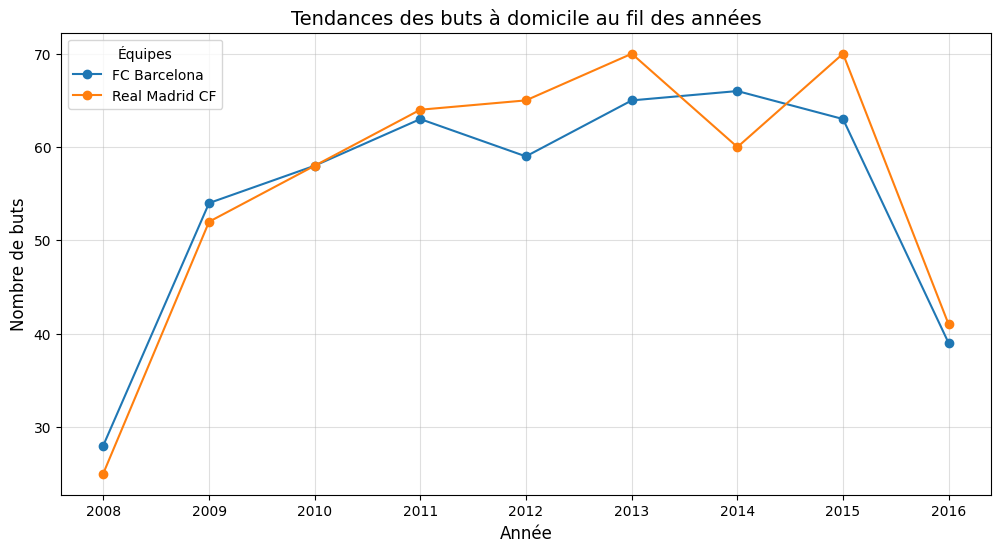

In [298]:
import pandas as pd
import matplotlib.pyplot as plt

def visualize_home_goals_trends(file_path, teams):
    """
    Visualise les tendances des buts à domicile au fil des années pour une ou plusieurs équipes.

    Paramètres :
        file_path (str) : Chemin vers le fichier CSV contenant les données.
        
        teams (list) : Liste des équipes à analyser (par exemple : ['1. FC Köln', 'Śląsk Wrocław']).
    """
    # Charger le fichier CSV
    try:
        data = pd.read_csv(file_path)
    except Exception as e:
        print(f"Erreur lors du chargement du fichier : {e}")
        return

    # Vérifier les colonnes nécessaires
    
    required_columns = ['date', 'HomeTeam_long_name', 'home_team_goal']
    if not all(col in data.columns for col in required_columns):
        print(f"Le fichier doit contenir les colonnes suivantes : {required_columns}")
        return

    # Filtrer les données pour les équipes spécifiées
    
    filtered_data = data[data['HomeTeam_long_name'].isin(teams)]

    if filtered_data.empty:
        print("Aucune donnée trouvée pour les équipes spécifiées.")
        return

    # Convertir la colonne 'date' en type datetime
    
    try:
        filtered_data['date'] = pd.to_datetime(filtered_data['date'], format='%Y')
    except Exception as e:
        print(f"Erreur lors de la conversion de la colonne 'date' : {e}")
        return

    # Agréger les buts par équipe et par année
    
    trends = filtered_data.groupby(['date', 'HomeTeam_long_name'])['home_team_goal'].sum().reset_index()

    # Visualisation
    plt.figure(figsize=(12, 6))
    for team in teams:
        team_data = trends[trends['HomeTeam_long_name'] == team]
        plt.plot(team_data['date'], team_data['home_team_goal'], marker='o', label=team)

    plt.title('Tendances des buts à domicile au fil des années', fontsize=14)
    plt.xlabel('Année', fontsize=12)
    plt.ylabel('Nombre de buts', fontsize=12)
    plt.legend(title="Équipes", fontsize=10)
    plt.grid(alpha=0.4)
    plt.show()


file_path = './mathes_groupped_by_season.csv'
visualize_home_goals_trends(file_path, ['FC Barcelona', 'Real Madrid CF'])


# clustirg


In [301]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

def cluster_teams(matches_file, attributes_file, n_clusters=3):
    """
    Effectue un clustering des équipes basé sur leurs attributs et leurs performances en buts à domicile.

    Paramètres :
        matches_file (str) : Chemin vers le fichier CSV des matchs.
        attributes_file (str) : Chemin vers le fichier CSV des attributs des équipes.
        n_clusters (int) : Nombre de clusters à former (par défaut : 3).
    """
    # Charger les fichiers CSV
    try:
        matches_data = pd.read_csv(matches_file)
        attributes_data = pd.read_csv(attributes_file)
    except Exception as e:
        print(f"Erreur lors du chargement des fichiers : {e}")
        return

    # Vérifier les colonnes nécessaires dans les deux datasets
    required_matches_columns = ['HomeTeam_long_name', 'home_team_goal']
    required_attributes_columns = ['team_long_name', 'buildUpPlaySpeed', 'buildUpPlayDribbling', 'buildUpPlayPassing']

    if not all(col in matches_data.columns for col in required_matches_columns):
        print(f"Le fichier des matchs doit contenir les colonnes suivantes : {required_matches_columns}")
        return

    if not all(col in attributes_data.columns for col in required_attributes_columns):
        print(f"Le fichier des attributs doit contenir les colonnes suivantes : {required_attributes_columns}")
        return

    # Calculer le total des buts à domicile par équipe
    home_goals = matches_data.groupby('HomeTeam_long_name')['home_team_goal'].sum().reset_index()
    home_goals.rename(columns={'HomeTeam_long_name': 'team_long_name', 'home_team_goal': 'total_home_goals'}, inplace=True)

    # Fusionner les données de buts avec les attributs des équipes
    merged_data = pd.merge(home_goals, attributes_data, on='team_long_name', how='inner')

    # Sélectionner les colonnes pertinentes pour le clustering
    clustering_features = ['total_home_goals', 'buildUpPlaySpeed', 'buildUpPlayDribbling', 'buildUpPlayPassing']
    data_for_clustering = merged_data[clustering_features].dropna()

    # Normaliser les données
    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(data_for_clustering)

    # Appliquer K-Means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    merged_data['cluster'] = kmeans.fit_predict(normalized_data)

    # Visualisation des clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x=merged_data['total_home_goals'],
        y=merged_data['buildUpPlayPassing'],
        hue=merged_data['cluster'],
        palette='viridis',
        s=100
    )
    plt.title('Clustering des équipes basé sur leurs attributs et performances', fontsize=14)
    plt.xlabel('Total des buts à domicile', fontsize=12)
    plt.ylabel('Build Up Play Passing', fontsize=12)
    plt.legend(title='Cluster', fontsize=10)
    plt.grid(alpha=0.4)
    plt.show()

    # Afficher les équipes par cluster
    for cluster in range(n_clusters):
        print(f"\nÉquipes dans le cluster {cluster}:")
        print(merged_data[merged_data['cluster'] == cluster]['team_long_name'].values)

# Exemple d'utilisation
matches_file = '/mnt/data/mathes_groupped_by_season.csv'
attributes_file = '/mnt/data/table_team_attribute.csv'
cluster_teams(matches_file, attributes_file, n_clusters=3)


ModuleNotFoundError: No module named 'distutils'